### 8.3 DQN과 아타리

"Playing Atari with Deep Reinforcement" 최초</br>
후속으로 기타 여러 실험을 추가하여 "Human-level Control through Deep Reinforcement Learning" 발표

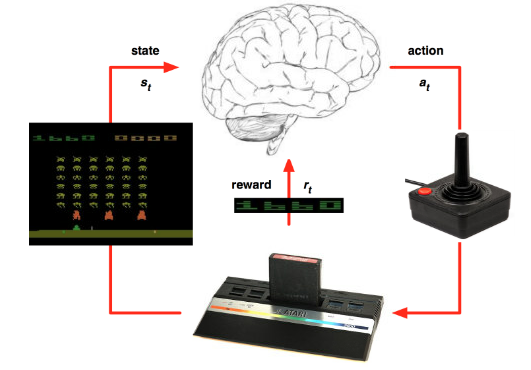

앞서 구현한 DQN 코드로 아타리를 잘 학습시킬 수 있으나 너무 오래 걸린다.</br>
그래서 실습은 생략...

### 8.3.1 아타리 게임 환경

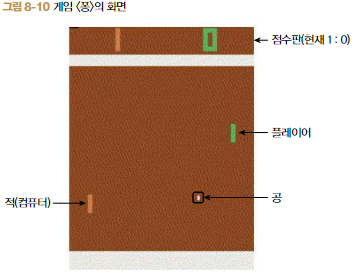

에이전트가 받는 '상태', state: 210 x 160 x 3(H x V x RGB) 게임 화면 이미지

###  8.3.2 전처리

<퐁> 게임은 Markov Decision Process 요건을 충족시키지 못함.</br>
MDP는 최적 행동을 결정하는데 필요한 정보가 '현재 상태'에 모두 담겨있어야하는데</br>
현재의 상태(게임 화면 이미지)로는 공이 어느 방향으로 움직이고 있는지 모르기 때문에 최적 행동을 결정하기 어려움

→ 이를 해결하기 위해 부분 관찰 마르코프 결정 과정(POMDP: Partially Observable Markov Decision Process) 적용

DQN 논문에서는 4개의 프레임이 연속된 이미지를 겹쳐서 하나의 '상태'로 취급

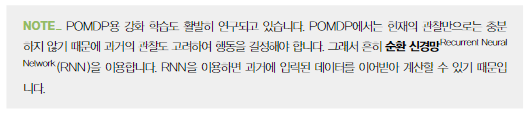

4개 프레임을 중첩하기 전에 전처리 작업

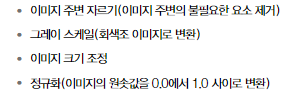

예시

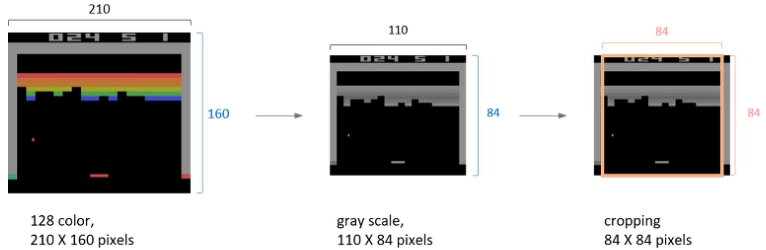

### 8.3.3 CNN

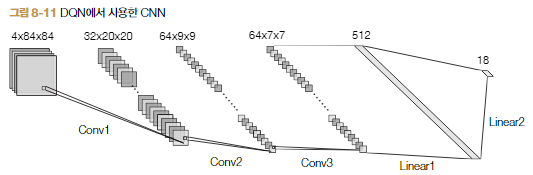

출력에 가까운 층은 완전 연결 계층으로 최종 출력층은 행동 후보 개수만큼 출력(활성화 함수, ReLU)

### 8.3.4 기타 아이디어

DQN 논문에서는 다음 기법들도 사용...강화 학습 알고리즘에 많이 쓰이는 것들...

- GPU 사용: GPU를 사용한 병렬 처리, 큰 데이터량, 학습 계산량

- ε값 조정: 활용과 탐색의 균형, 에이전트의 경험이 늘어날수록 (에피소드 수가 늘어날 수록) 가치 함수의 신뢰도가 높아지는데 탐색 비율을 줄이고 활용 비중 높이는 전략이 필요.

- "ε탐욕 정책에서 에이전트가 행동을 거듭할수록 ε값을 줄인다"
- DQN논문: ε을 1.0 ~ 0.1으로 선형으로 감소시키고 100만 단계 이후 0.1로 고정

- 보상 클리핑(Reward Clipping): 학습을 촉진하는 방법, 보상 -1.0~1.00으로 조정(<퐁>에서 보상 -1, 0, 1)

----------------------------------------

# 8.4 DQN 확장

### 8.4.1 Double DQN

- DQN은 '목표 신경망' 기법 사용</br>
목표: 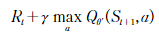

- DQN은 의 값을 위 식과 가까워지게 학습 → TD 목표

- 하지만 오차가 포함된 에 max 연산을 수행하면 실제 Q함수를 사용해 계산할 때보다 과대적합 문제 발생(부록 3 확인)

→ 이를 해결하기 위해 Double DQN 등장

- DDQN의 TD 목표: 

Q = 

Q' = 

- Q를 사용하여 최대가 되는 행동을 선택하고 실제 값은 Q' 에서 구함

- 과대적합 사라지고 학습이 안정적

- 이것의 의미는 노이즈 값에 바로 반응하는 것이 아니기 때문에 좋다는 뜻으로 받아들이면 될 듯(개인적인 표현)

### 8.4.2 우선순위 경험 재생(PER)

- DQN 경험 재생은 경험을 버퍼에 저장하고 학습 시 버퍼에서 경험 데이터를 무작위로 추출하여 사용

- PER은 경험 데이터를 우선 순위에 따라 선택되도록 한 기법

- 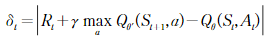

- δ가 크면 배워야할 것이 많다.</br>
δ가 작으면 좋은 매개변수이고 배울 것이 적다.

- 경험 데이터에 δ를 추가하여 버퍼에 저장

- 

- 경험데이터를 꺼낼 때 δ를 이용하여 경험 데이터가 선택될 확률 구함

- 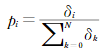

- 경험 데이터  N개에서 i번째 경험 데이터가 선택될 확률

우선순위 경험 재생을 사용하면 배울게 많은 데이터일수록 우선적으로 사용되기 때문에 학습이 더 빨리 진행되리라 기대

### 8.4.3 Dueling DQN

- 신경망 구조를 개선한 기법

- 어드밴티지 함수 = Q함수 - 가치 함수

- 

- 어드밴티지 함수는 a라는 행동이 정책 π에 따라 행동할 때보다 얼마나 좋은지 나타냄

- 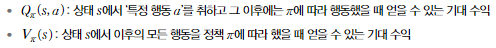

- 

- 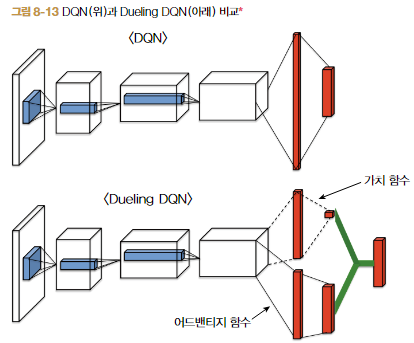

- 어드밴티지 함수 A(s,a)와 가치 함수 V(s)로 분기되고 마지막에 다시 함쳐서 Q(s,a) 출력

- 이점: 무슨 행동을 선택해도 결과가 달라지지 않는 상황에서는 이점

- 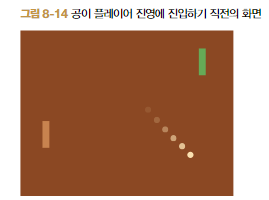

- 어떠한 행동을 해도 지는 경유이지만 위 상태를 경험하면 V(s)가 학습되어 다른 행동을 시도하지 않아도 Q(s,a)의 근사성능이 좋아짐

# 8.5 정리

- DQN 핵심: 경험 재생, 목표 신경망
- DQN 확장 기법: Double DQN, 우선순위 경험 재생, Dueling DQN
- OpenAI Gym: 카트 폴, 퐁 소개